In [136]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings("ignore")

# 1. Import the cleaned dataset

### 1.1 Read the dataset

In [137]:
data= pd.read_csv('Data/final_dataset_v2.csv')
data.head()

,AMT_CREDIT_SUM,buro_count,CREDIT_ACTIVE_Active,DAYS_CREDIT_UPDATE,DAYS_CREDIT,CREDIT_ACTIVE_Closed,AMT_DOWN_PAYMENT,RATE_DOWN_PAYMENT,CNT_INSTALMENT_FUTURE,CNT_INSTALMENT,SK_DPD_DEF_x,SK_DPD_x,MONTHS_BALANCE_x,DAYS_TERMINATION,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,AMT_GOODS_PRICE_y,AMT_ANNUITY,CNT_PAYMENT,NAME_GOODS_CATEGORY_XNA,NAME_PORTFOLIO_Cards,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_PRODUCT_TYPE_walk-in,NAME_GOODS_CATEGORY_Furniture,PRODUCT_COMBINATION_Cash Street: high,PRODUCT_COMBINATION_Cash X-Sell: low,PRODUCT_COMBINATION_POS industry with interest,PRODUCT_COMBINATION_POS mobile with interest,PRODUCT_COMBINATION_Card Street,NAME_YIELD_GROUP_low_normal,NAME_YIELD_GROUP_low_action,NAME_SELLER_INDUSTRY_Connectivity,NAME_SELLER_INDUSTRY_XNA,NAME_YIELD_GROUP_XNA,NAME_YIELD_GROUP_high,NAME_PAYMENT_TYPE_XNA,NAME_PAYMENT_TYPE_Cash through the bank,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Approved,CODE_REJECT_REASON_LIMIT,CODE_REJECT_REASON_SCOFR,NAME_CLIENT_TYPE_New,CODE_REJECT_REASON_XAP,AMT_APPLICATION,NAME_CONTRACT_TYPE_Revolving loans_y,NAME_CONTRACT_TYPE_Consumer loans,SELLERPLACE_AREA,DAYS_DECISION,HOUR_APPR_PROCESS_START_y,AMT_CREDIT_y,CODE_REJECT_REASON_HC,AMT_PAYMENT,AMT_PAYMENT_x,AMT_PAYMENT_y,DAYS_ENTRY_PAYMENT,DAYS_ENTRY_PAYMENT_x,DAYS_ENTRY_PAYMENT_y,NUM_INSTALMENT_VERSION_x,NUM_INSTALMENT_NUMBER_x,DAYS_INSTALMENT_x,AMT_INSTALMENT_x,NUM_INSTALMENT_NUMBER_y,DAYS_INSTALMENT,DAYS_INSTALMENT_y,AMT_INSTALMENT,AMT_INSTALMENT_y,EXT_SOURCE_2,AMT_GOODS_PRICE_x,AMT_ANNUITY_x,DAYS_LAST_PHONE_CHANGE,ORGANIZATION_TYPE_XNA,FLAG_DOCUMENT_3,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_EMP_PHONE,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,REGION_POPULATION_RELATIVE,AMT_CREDIT_x,AMT_INCOME_TOTAL,EMERGENCYSTATE_MODE_No,REG_CITY_NOT_WORK_CITY,NAME_CONTRACT_TYPE_Cash loans_x,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_Pensioner,CODE_GENDER_M,CODE_GENDER_F,NAME_EDUCATION_TYPE_Higher education,OCCUPATION_TYPE_Laborers,NAME_EDUCATION_TYPE_Secondary / secondary special,TARGET
0,90310.815,20.0,0.300,-846.050,-1207.350,0.650,675.00,0.026184,21.542373,31.550847,0.076271,0.076271,-25.237288,103724.428571,-304.714286,-1106.142857,365243.0,103720.857143,143151.665625,8299.66500,25.750000,0.625000,0.00,0.375000,0.0,0.0,0.000000,0.0,0.125000,0.000000,0.375000,0.0,0.250000,0.0,0.375000,0.375000,0.00,0.625000,0.75,0.25,0.0,1.0,0.0,0.0,0.125000,1.0,143151.665625,0.00,0.375000,17.500000,-1001.00,10.750000,155689.228125,0.0,84.600,12279.940500,120415.545,-1798.0,-740.958333,-34.0,1.108333,10.933333,-727.016667,12776.410500,27.0,-1782.0,-24.0,2977.380,120415.545,0.743537,463500.0,19413.0,-1631.0,1.0,1.0,3.0,3.0,0.0,-4630.0,-10807.0,365243.0,-22296.0,0.018209,536917.5,202500.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,247184.550,10.0,0.400,-378.100,-719.100,0.600,0.00,0.000000,13.391304,18.869565,0.000000,0.000000,-11.217391,182409.000000,-7.500000,-517.500000,365243.0,182402.500000,91462.500000,6467.32125,9.000000,0.750000,0.50,0.250000,0.0,0.5,0.250000,0.0,0.000000,0.250000,0.000000,0.5,0.250000,0.0,0.500000,0.250000,0.50,0.250000,0.50,0.50,0.5,0.5,0.0,0.0,0.250000,0.5,91462.500000,0.50,0.250000,21.250000,-481.75,7.000000,102038.625000,0.5,5858.595,9134.097750,33641.415,-634.0,-354.000000,-72.0,1.050000,5.950000,-338.850000,9134.097750,13.0,-618.0,-57.0,5858.595,33641.415,0.017470,180000.0,9000.0,-649.0,0.0,0.0,3.0,3.0,1.0,-3005.0,-4596.0,-1552.0,-10355.0,0.008068,180000.0,40500.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
2,23774.220,1.0,0.000,-320.000,-510.000,1.000,2652.75,0.094063,8.032258,13.161290,0.000000,0.000000,-48.548387,120659.333333,-979.666667,-1369.666667,365243.0,120654.666667,50676.000000,4808.19000,14.000000,0.333333,0.00,0.666667,0.0,0.0,0.000000,0.0,0.333333,0.000000,0.666667,0.0,0.333333,0.0,0.666667,0.333333,0.00,0.666667,0.00,1.00,0.0,1.0,0.0,0.0,0.333333,1.0,50676.000000,0.00,0.666667,14.333333,-1407.00,11.000000,55999.500000,0.0,1211.670,3827.413636,

# 2. Data Preprocessing

### 2.1 Data Seperation

In [113]:
#Extracting Y value from the dataframe
filtered_columns = [i for i in data.columns if i not in ['TARGET']]
Y= data.TARGET
X = data[filtered_columns]

In [114]:
# Split into train & test with 30% test size
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=1)

In [115]:
# Check the split shapes
print('X_train:',X_train.shape)
print('Y_train:', Y_train.shape)
print('X_test:', X_test.shape)
print('Y_test:', Y_test.shape)

X_train: (395760, 95)
Y_train: (395760,)
X_test: (169612, 95)
Y_test: (169612,)


### 2.2 Scale the test & train datasets

In [116]:
# Scaling the test and train dataframes
num_cols = X_test.columns
scaler_num = StandardScaler()
X_train_num1 = scaler_num.fit_transform(X_train)

X_train_num1 = scaler_num.transform(X_train)
X_test_num1 = scaler_num.transform(X_test)

X_train = pd.DataFrame(X_train_num1, columns=num_cols)
X_test = pd.DataFrame(X_test_num1, columns=num_cols)

# 3. Experimenting Top best performing algorithms

### 3.1 LGBMClassifier

In [117]:
lgbm = LGBMClassifier(n_estimators=1000, n_jobs=10,
        learning_rate=0.03,
        num_leaves=34,
        colsample_bytree=0.9,
        subsample=0.8,
        max_depth=8,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=375,
        silent=-1,
        verbose=-1,random_state=1
        )
lgbm.fit(X_train,Y_train)
predictions = lgbm.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(Y_test, predictions)
print('AUC:',auc) # AUC: 0.829979058439783

AUC: 0.8308153789890531


### 3.2 LogisticRegression

In [118]:
logistic = LogisticRegression(random_state=1, n_jobs=10)
logistic.fit(X_train,Y_train)
predictions = logistic.predict_proba(X_test)[:, 1]
auc = metrics.roc_auc_score(Y_test, predictions)
print('AUC:',auc) # AUC: 0.7428057026278816

AUC: 0.744340199338158


### 3.3 Random Forest

In [119]:
forest = ensemble.RandomForestClassifier(random_state=1, n_jobs=10)
forest.fit(X_train,Y_train)
predicted_y = forest.predict(X_test)
auc = metrics.roc_auc_score(Y_test, predicted_y)
print('AUC:',auc) # AUC: 0.9934888865345095

AUC: 0.9937493803695503


# 4. Building a VotingClassifier

### 4.1 Kfold validation 

In [120]:
data= X_train
y = Y_train
folds = KFold(n_splits=5, shuffle=True, random_state=546789)
oof_preds = np.zeros(data.shape[0])


feature_importance_df = pd.DataFrame()

feats = [f for f in data.columns if f not in ['SK_ID_CURR']]

for n_fold, (trn_idx, val_idx) in enumerate(folds.split(data)):
    trn_x, trn_y = data[feats].iloc[trn_idx], y.iloc[trn_idx]
    val_x, val_y = data[feats].iloc[val_idx], y.iloc[val_idx]
    voting =ensemble.VotingClassifier(estimators=[('forest', forest),
                                              ('logit', logistic),
                                              ('lgbm', lgbm)], voting='soft', n_jobs=10, flatten_transform=True)
    voting.fit(trn_x, trn_y
           )
    oof_preds[val_idx] = voting.predict(val_x)
    print('Fold %2d AUC : %.6f' % (n_fold + 1, metrics.roc_auc_score(val_y, oof_preds[val_idx])))
    del voting, trn_x, trn_y, val_x, val_y

print('Full AUC score %.6f' % metrics.roc_auc_score(y, oof_preds)) 

Fold  1 AUC : 0.907736
Fold  2 AUC : 0.906752
Fold  3 AUC : 0.908469
Fold  4 AUC : 0.905822
Fold  5 AUC : 0.907437
Full AUC score 0.907243


### 4.2 Training the model

In [121]:
# Train the voting classifier
voting =ensemble.VotingClassifier(estimators=[('forest', forest),
                                              ('logit', logistic),
                                              ('lgbm', lgbm)], voting='soft',n_jobs=10, flatten_transform=True)
voting.fit(X_train,Y_train)

VotingClassifier(estimators=[('forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            mi... silent=-1,
        subsample=0.8, subsample_for_bin=200000, subsample_freq=0,
        verbose=-1))],
         flatten_transform=True, n_jobs=10, voting='soft', weights=None)

In [122]:
predicted_y = voting.predict(X_test)

### 4.3 Classification Report

In [123]:
auc = metrics.roc_auc_score(Y_test, predicted_y)
accuracy = metrics.accuracy_score(Y_test, predicted_y)
print(classification_report(Y_test, predicted_y))
print('AUC:',auc)
print('Accuracy:',accuracy)

              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91     84976
         1.0       0.88      0.97      0.92     84636

   micro avg       0.92      0.92      0.92    169612
   macro avg       0.92      0.92      0.92    169612
weighted avg       0.92      0.92      0.92    169612

AUC: 0.9180424209028077
Accuracy: 0.9179421267363158


### 4.4 Confusion Matrix

Text(0.5, 257.44, 'Predicted label')

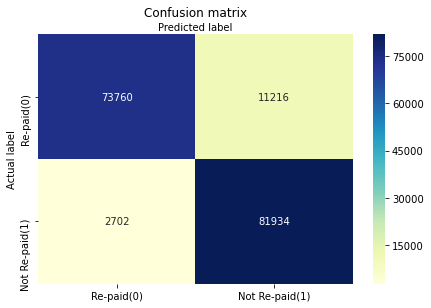

In [124]:
cnf_matrix = metrics.confusion_matrix(Y_test, predicted_y)
class_names=['Re-paid(0)','Not Re-paid(1)'] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', xticklabels=class_names,
    yticklabels=class_names)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### 4.5 ROC Cuve

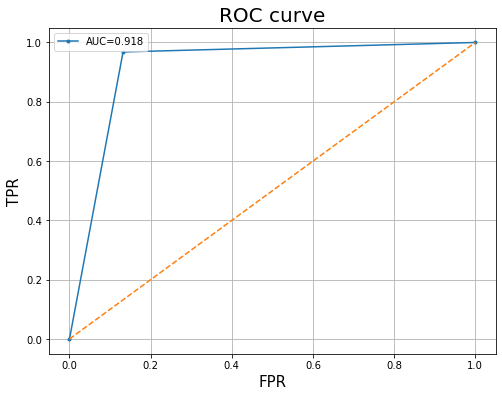

In [125]:
%matplotlib inline
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predicted_y)
auc = metrics.roc_auc_score(Y_test, predicted_y)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, marker='.')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC curve', fontsize = 20)
plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.grid()
plt.legend(["AUC=%.3f"%auc])
plt.show()

### 4.6 Top 20 feature Importances out of 95

In [134]:
features = dict(zip(X_train.columns, forest.feature_importances_))
df=pd.DataFrame(features.items(), columns=['Features','Values'])

df = df.sort_values('Values', ascending=False).reset_index(drop=True)
df.index = df.index + 1
df = df.reset_index().rename(columns={'index': 'Rank'}).set_index('Rank')
df.head(20)

,Features,Values
Rank,,
1,EXT_SOURCE_2,0.061159
2,DAYS_CREDIT,0.032162
3,DAYS_BIRTH,0.026167
4,DAYS_EMPLOYED,0.022422
5,DAYS_CREDIT_UPDATE,0.020851
6,DAYS_REGISTRATION,0.019914
7,DAYS_ID_PUBLISH,0.019846
8,AMT_PAYMENT,0.019748
9,AMT_ANNUITY_x,0.019675
